In [13]:
## required library
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

## Root Mean Square Error
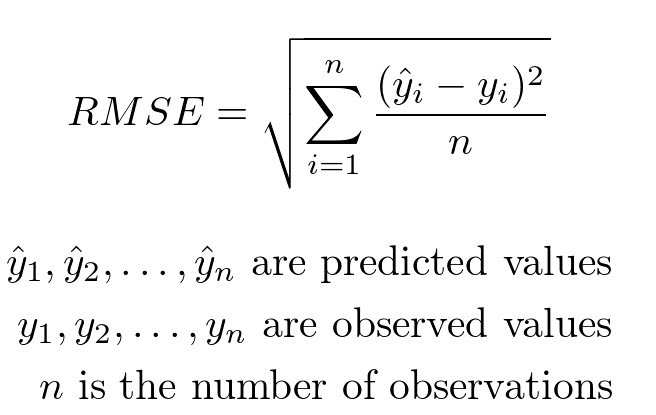

In [3]:
def rmse(predicted, actual):
    #numerator = sum error. summatiom(predicted - actual)
    sum_error = 0
    
    for y, y_hat in zip(predicted, actual):
        predicted_error = y - y_hat
        sum_error += (predicted_error**2)

    mean_error = sum_error/len(actual)

    return sqrt(mean_error)

## Computing the slope and intercept
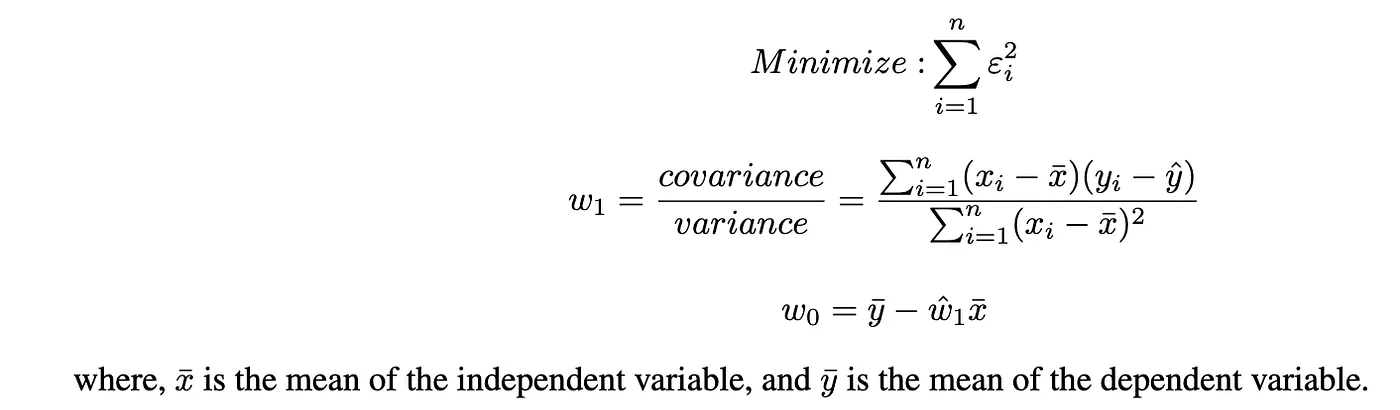

In [4]:
def compute_coefficients(x, y):
    """
    This function is used for computing the coefficients slope m, intercept i, 
    These coefficients allow us to compute the predicted values
    """
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = 0
    denominator = 0

    for i in range(n):
        numerator += (x[i]-x_mean)*(y[i]-y_mean)
        denominator +=  (x[i]-x_mean)**2

    m = numerator/denominator
    b = y_mean - m*x_mean

    return m, b

In [5]:
def predict_value(x, m, b):
    return (m*x)+b

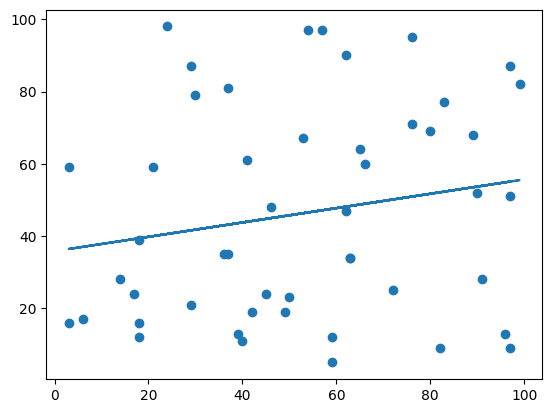

In [11]:
x = np.random.randint(low=1, high=100, size=49)
y = np.random.randint(low=1, high=100, size=49)

#computing coefficients
m, b = compute_coefficients(x, y)
y_hat = predict_value(x, m, b)
error = rmse(y_hat, y)

plt.scatter(x, y, label="Observed value")
plt.plot(x, y_hat, label="Predicted Value")
plt.show()

In [ ]:
def OLS_LR(X, y):
    num = 0
    den = 0
    X_mean = np.mean(X)
    y_mean = np.mean(y)

    for i in range(len(X)):
        num += (y[i] - y_mean) * (X[i] - X_mean)
        den += (X[i] - X_mean)**2

    coef = num / den

    inter = y_mean - coef * X_mean

    return coef, inter


In [19]:
# Implementing GD
class GDLR:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):
        n = len(X_train)
        delta_coef = 0
        delta_inter = 0
        self.coef_ = 1
        self.intercept_ = 1

        for i in range(self.epochs):
            delta_inter += (-2/n) * (y_train[i] - self.coef_ * X_train[i] - self.intercept_)
            delta_coef += (-2/n) * (y_train[i] - self.coef_ * X_train[i] - self.intercept_) * X_train[i] 
            self.coef_ = self.coef_ - (self.lr * delta_coef)
            self.intercept_ = self.intercept_ - (self.lr * delta_inter)

        print(self.coef_, self.intercept_)

    def predict(self, X_test):
        return self.coef_ * X_test + self.intercept_


In [73]:
# Implementing GD
class GDLR:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):
        n = len(X_train)
        delta_coef = 0
        delta_inter = 0
        self.coef_ = 0
        self.intercept_ = 0

        for i in range(self.epochs):
            y_pred = np.dot(X_train, self.coef_) + self.intercept_
            error = y_train - y_pred

            delta_inter += (-2/n) * np.sum(error)
            delta_coef += (-2/n) * np.sum(error * X_train)
            
            self.coef_ = self.coef_ - (self.lr * delta_coef)
            self.intercept_ = self.intercept_ - (self.lr * delta_inter)

        print(self.coef_, self.intercept_)

    def predict(self, X_test):
        return self.coef_ * X_test + self.intercept_


In [74]:
import numpy as np

X = np.random.rand(100, 1)
y = np.random.randint(0, 100, (100,1))
y.shape


(100, 1)

In [75]:
gdlr = GDLR(0.1, 100)
gdlr.fit(X, y)
y_pred = gdlr.predict(X)


17.934710400689966 40.679013571754666


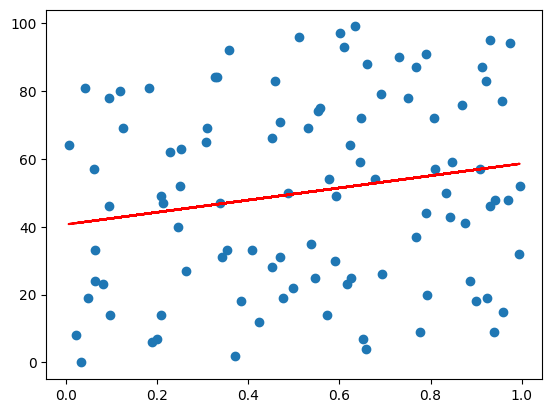

In [76]:
plt.scatter(X, y)
plt.plot(X, y_pred, c="red")